# Python basics

In [4]:
two_pi = 3.14 * 2

6.28

In [5]:
type('Barcelona')

str

In [8]:
bool_expr = True and False
f'The expression above is {bool_expr}'

'The expression above is False'

Calling a method on a `str`

In [9]:
name = 'roger'
name.capitalize()

'Roger sole sotillo'

In [10]:
name.endswith('s')

False

# Pandas

In [67]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
listings_df = pd.read_csv('data/AB_NYC_2019.csv')

## DataFrame
`pd.read:csv()` Creates a DataFrame (hence the name _df).
DataFrames are 2d arrays.
### Attributes
- .shape 
- .columns
- .dtypes
### Methods
- .head()
- .tail()

In [8]:
listings_df.shape
# result shows number of rows and colums

(48895, 16)

In [9]:
listings_df.columns
# returns an Index with the column names

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [11]:
listings_df.dtypes
# returns data types for values in columns
# should always be done

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [13]:
listings_df.head(3)
# default value is 5

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


### Cleaning the DataFrame

In [14]:
listings_df.isnull().sum()
# check null values per column

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
columns_to_drop = ['id', 'host_name', 'last_review']
listings_df.drop(columns_to_drop, axis='columns', inplace=True)

In [17]:
listings_df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Replace `nan` with `0` from the `reviews_per_month` column

In [18]:
listings_df.fillna({'reviews_per_month': 0}, inplace=True)

In [19]:
listings_df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Select just 3 columns from the whole DataFrame

In [21]:
listings_df[['name', 'neighbourhood_group','price']]

,name,neighbourhood_group,price
0,Clean & quiet apt home by the park,Brooklyn,149
1,Skylit Midtown Castle,Manhattan,225
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,150
3,Cozy Entire Floor of Brownstone,Brooklyn,89
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,80
...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Brooklyn,70
48891,Affordable room in Bushwick/East Williamsburg,Brooklyn,40
48892,Sunny Studio at Historical Neighborhood,Manhattan,115
48893,43rd St. Time Square-cozy single bed,Manhattan,55


Select first 8 lines and combine with column filter

In [23]:
listings_df[0:8][['name', 'neighbourhood_group','price']]

,name,neighbourhood_group,price
0,Clean & quiet apt home by the park,Brooklyn,149
1,Skylit Midtown Castle,Manhattan,225
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,150
3,Cozy Entire Floor of Brownstone,Brooklyn,89
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,80
5,Large Cozy 1 BR Apartment In Midtown East,Manhattan,200
6,BlissArtsSpace!,Brooklyn,60
7,Large Furnished Room Near B'way,Manhattan,79


## Boolean indexing

In [24]:
listings_df['price'] > 100
# returns a series (column of DataFrame)

0         True
1         True
2         True
3        False
4        False
         ...  
48890    False
48891    False
48892     True
48893    False
48894    False
Name: price, Length: 48895, dtype: bool

This can be used for filtering the whole DataFrame

In [25]:
listings_df[listings_df['price'] < 10].shape
# there are 11 flats under 10$ per night

(11, 13)

### What are the 10 most reviewed listings

In [26]:
listings_df.nlargest(10, 'number_of_reviews')

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


### What are the NY neighbourhood groups with listings?

In [27]:
listings_df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

### How many listings per NY neighbourhood group?

In [29]:
listings_df['neighbourhood_group'].value_counts()
# sorted automatically

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

### What are the top 10 neighbourhoods with listings?

In [30]:
listings_df['neighbourhood'].value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

### Plot last data

<AxesSubplot:>

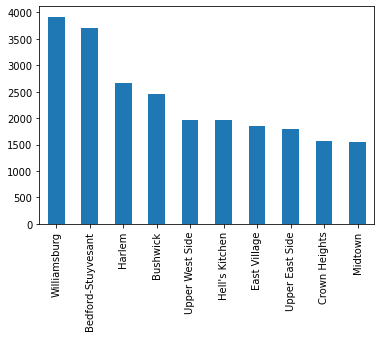

In [33]:
listings_df['neighbourhood'].value_counts().head(10).plot(kind='bar')

## Seaborn plots
An easier way to do the plots above

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

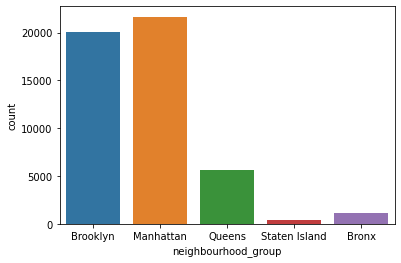

In [37]:
sns.countplot(data=listings_df, x='neighbourhood_group')

<AxesSubplot:xlabel='room_type', ylabel='count'>

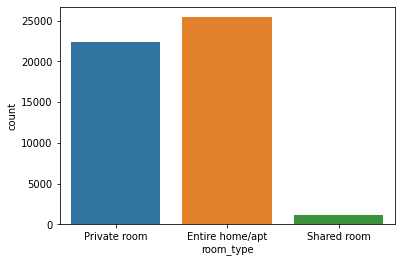

In [38]:
sns.countplot(data=listings_df, x='room_type')

Plots can be sorted too as they would be in matplotlib

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

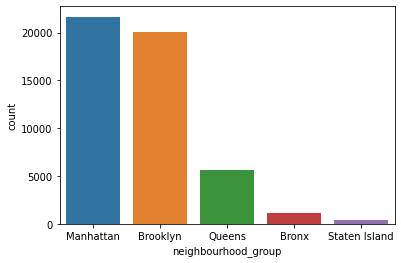

In [39]:
order = listings_df['neighbourhood_group'].value_counts().index
sns.countplot(data=listings_df, x='neighbourhood_group', order=order)

### What is the influence of the neighbourhood group in the room type

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

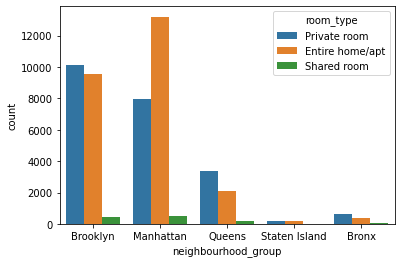

In [40]:
sns.countplot(data=listings_df, x='neighbourhood_group', hue='room_type')

### Distribution of prices

c:\Users\roger\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

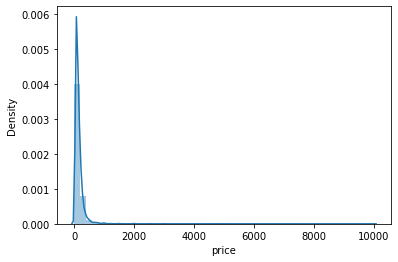

In [45]:
sns.distplot(listings_df['price'])

<AxesSubplot:xlabel='price', ylabel='Density'>

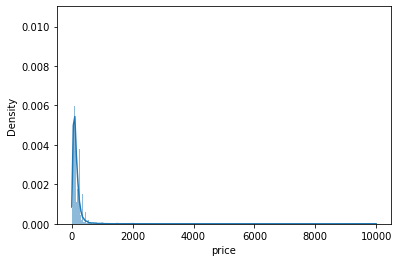

In [51]:
sns.histplot(listings_df['price'], kde=True, stat="density", linewidth=0)

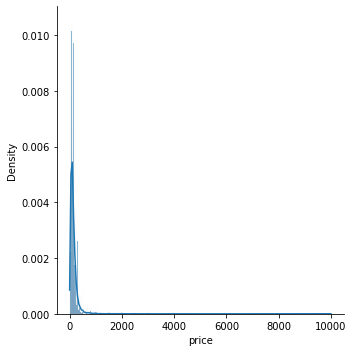

In [53]:
sns.displot(listings_df['price'], stat='density', kde=True)

Data is not easily visible because there are some flats with a very expensive night rate

In [52]:
listings_df[listings_df['price'] < 500].shape

(47660, 13)

Using this filter we only take out 1000 occurences but data will be more visible

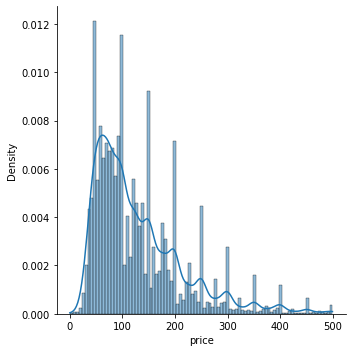

In [59]:
affordable_df = listings_df[listings_df['price'] < 500]
sns.displot(affordable_df['price'], stat='density', kde=True)

In [61]:
affordable_df['price'].mean()

130.0539026437264

In [62]:
affordable_df['price'].median()

100.0

### What is the distribution of flat prices based on neighbourhood groups?

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

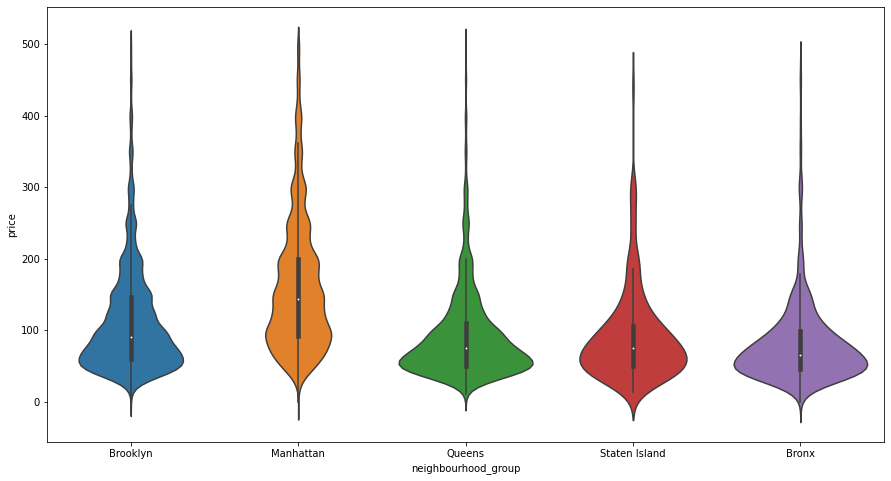

In [68]:
plt.figure(figsize=(15, 8))
sns.violinplot(data=affordable_df, x='neighbourhood_group', y='price')

### Can we plot listings on a map?

Yes, using scatter plots

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

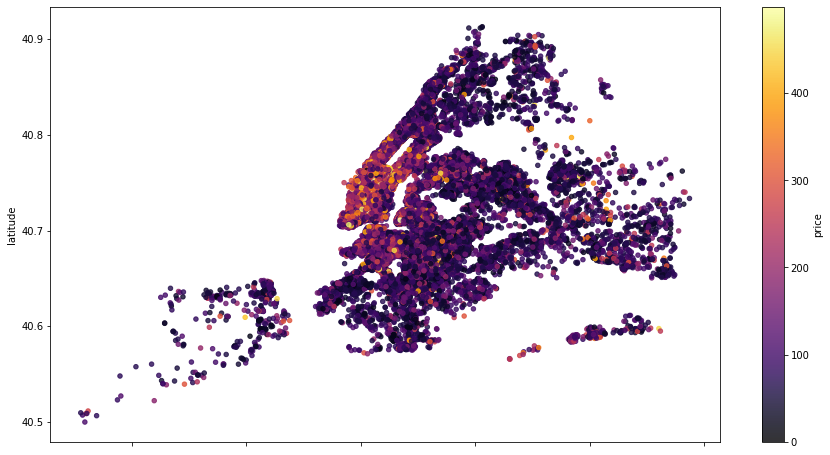

In [69]:
affordable_df.plot(kind='scatter', x='longitude', y='latitude', c='price', cmap='inferno', colorbar=True, alpha=0.8, figsize=(15,8))

In [ ]:
import urllib
# URL does not work
# i = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commos/e/ec/Neighbourhoods_New_York_City_Map.PNG')
# plt.imshow(plt.imread(i), zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])
# ax = plt.gca()
affordable_df.plot(kind='scatter', x='longitude', y='latitude', c='price', cmap='inferno', colorbar=True, alpha=0.8, figsize=(15,8))